<a href="https://colab.research.google.com/github/jdebecka/ML_Keras/blob/main/Furier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Julia Debecka s19420 

Data useed - Set 0 

Number of samples - 1024

# Transformata furiera 

It is used in order to 


In [99]:
import argparse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq, ifft
from scipy.signal import find_peaks

In [100]:
 data = pd.read_csv('/content/setf0.csv', header=None)

Datat sample has 1024 and the total sampling time is 1.0s. so in order to be able to determine time when the sample approximatly was collected we have to dive total time over number of samples

In [101]:
data['time'] = data.index * (1.0/1024)

In [102]:
data.columns = 'amplitude', 'time'

In [103]:
data.head()

,amplitude,time
0,0.524939,0.000000
1,0.770165,0.000977
2,0.783501,0.001953
3,2.281160,0.002930
4,2.149630,0.003906


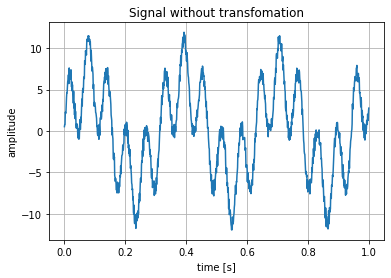

In [104]:
_, ax = plt.subplots()
ax.plot(data.time, data.amplitude)

ax.set(xlabel='time [s]', ylabel='amplitude', title='Signal without transfomation')
ax.grid()

plt.show()



*   N - number of sample points 
*   T - sample spacing 




In [105]:
def fourier(data):
  x = np.array(data, dtype=float)
  N = len(x)
  n = np.arrange(N)
  k = n.reshape((N, 1))
  M = np.exp(-2j * np.pi * k * n / N)
  return np.dot(M, x)

In [106]:
N = len(data)
T = 1.0 / N

x = np.linspace(0.0, T * N, N, endpoint=False)

amplitude_time = data.amplitude
amplitude_transformed = fft(np.array(amplitude_time))
time_to_freq = fftfreq(N, T)[:N//2]
amplitude_to_graph = 2.0/N * np.abs(amplitude_transformed[0:N//2])
peaks, _ = find_peaks(amplitude_to_graph, prominence=1)

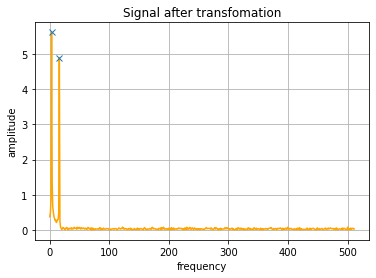

In [107]:
_, ax2 = plt.subplots()
ax2.plot(time_to_freq, amplitude_to_graph, color='Orange')
ax2.plot(peaks, amplitude_to_graph[peaks], "x")
ax2.set(xlabel='frequency', ylabel='amplitude', title='Signal after transfomation')
ax2.grid()

plt.show()

In [108]:
peaks, amplitude_to_graph[peaks]
freq_peak_1 = peaks[0]
freq_peak_2 = peaks[1]

amplitude_peak_1 = amplitude_to_graph[freq_peak_1]
amplitude_peak_2 = amplitude_to_graph[freq_peak_2]


sig_det_1 = amplitude_peak_1 * np.sin(freq_peak_1 * 2 * np.pi * x)
sig_det_2 = amplitude_peak_2 * np.sin(freq_peak_2 * 2 * np.pi * x)

# Determistyczne składowe 



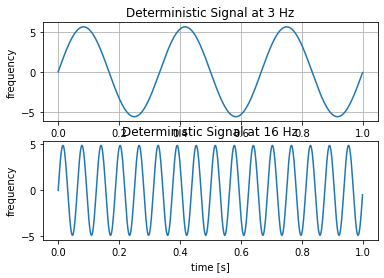

In [109]:
fig, (ax, ax2) = plt.subplots(2, 1)
ax.plot(x, sig_det_1)
ax2.plot(x, sig_det_2)
ax.set(xlabel='time [s]', ylabel='frequency', title=f'Deterministic Signal at {freq_peak_1} Hz')
ax2.set(xlabel='time [s]', ylabel='frequency', title=f'Deterministic Signal at {freq_peak_2} Hz')

ax.grid()

plt.show()

# Cleaning the signal 

In order to clean the signal you have to sum up the picks that we previously got and subtrack them from the data before transformation

In [110]:
total_sig = sig_det_1 + sig_det_2

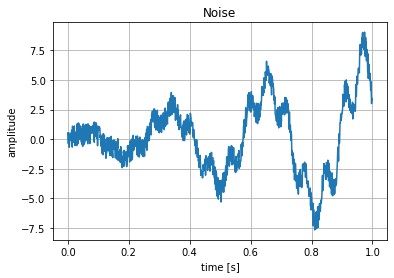

In [111]:
noise = data.amplitude - total_sig 

_, ax = plt.subplots()
ax.plot(data.time, noise)

ax.set(xlabel='time [s]', ylabel='amplitude', title='Noise')
ax.grid()

plt.show()

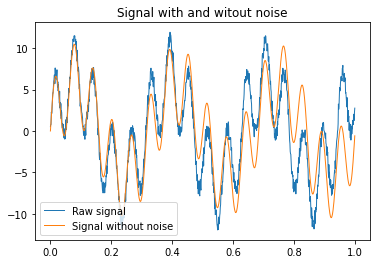

In [112]:
plt.plot(x, data.amplitude[:N], label='Raw signal', linewidth=1)
plt.plot(x, total_sig, label = 'Signal without noise', linewidth = 1)
plt.legend()
plt.title('Signal with and witout noise')
plt.show();

# Summary

In [113]:
max_amplitude_beggining = max(data.amplitude)

energy_raw_signal = sum(amplitude_time**2)
energy_sig_det_1 = sum(sig_det_1**2)
energy_sig_det_2 = sum(sig_det_2**2)